In [1]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


In [3]:
os.chdir("/gdrive/My Drive/emiroğlu")
!ls

burak  burkay  Image.png  logo.png


In [4]:
data="/gdrive/My Drive/emiroğlu"
category=["burak","burkay"]


KeyboardInterrupt: ignored

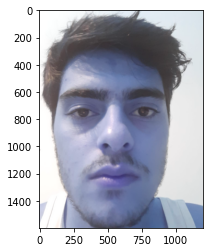

In [5]:
training_data=[]
def creating_training():
  for i in category:
    path=os.path.join(data,i)
    class_num=category.index(i)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        new_array=cv2.resize(img_array,(50,50))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
creating_training()
    

In [ ]:
for i in category:
  path=os.path.join(data,i)
  class_num=category.index(i)
  for img in os.listdir(path):
    print(img)

In [ ]:
import random
random.shuffle(training_data)


In [ ]:
for i in training_data:
  print(i[1])

In [ ]:
x=[]
y=[]
for features,labels in training_data:
  x.append(features)
  y.append(labels)

x=np.array(x)
x=np.array(x/255.0)
y=np.array(y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten
from keras.optimizers import Adam
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=x.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x,y,batch_size=100,epochs=10,validation_split=0.1)